<a href="https://colab.research.google.com/github/Deepanshu2344/Stop-The-Scam--Job-Post-Detection/blob/main/Spot_the_Scam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import joblib

In [ ]:
from google.colab import files
upload=files.upload()

Saving Test_data.csv to Test_data.csv
Saving Training_data.csv to Training_data.csv


In [ ]:
train_df = pd.read_csv('Training_data.csv')
test_df = pd.read_csv('Test_data.csv')

train_df.drop(columns=['job_id'], inplace=True)
test_df.drop(columns=['job_id'], inplace=True)

In [ ]:
train_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Contact Center Representatives,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",The position requires the following qualificat...,Our company offers a competitive salary plus B...,0,1,0,Full-time,Entry level,Unspecified,Financial Services,Customer Service,0
1,Customer Service Associate,"US, TX, Dallas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 1 year customer servi...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
2,Automated Test Analyst,"NZ, , Auckland",Permanent,NaN,SilverStripe CMS &amp; Framework is an open so...,We are looking for a dedicated and passionate ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0
3,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
4,Content Marketing/SEO Manager,"US, CA, Los Angeles",Marketing,NaN,MeUndies is a lifestyle brand that is transfor...,MeUndies is a lifestyle brand that is transfor...,REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...,"WHY MEUNDIES?We're a fast-growing, VC-backed c...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,0


In [ ]:
text_columns = ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
train_df[text_columns] = train_df[text_columns].fillna('')
test_df[text_columns] = test_df[text_columns].fillna('')

In [ ]:
label_encoders = {}
for col in ['employment_type', 'required_experience', 'required_education', 'industry', 'function']:
    le = LabelEncoder()

    all_unique_values = pd.concat([train_df[col].astype(str), test_df[col].astype(str)]).unique()
    le.fit(all_unique_values)
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))
    label_encoders[col] = le

In [ ]:
train_df['combined_text'] = (train_df['title'].astype(str) + ' ' +
                             train_df['location'].astype(str) + ' ' +
                             train_df['company_profile'].astype(str) + ' ' +
                             train_df['description'].astype(str) + ' ' +
                             train_df['requirements'].astype(str) + ' ' +
                             train_df['benefits'].astype(str))

test_df['combined_text'] = (test_df['title'].astype(str) + ' ' +
                            test_df['location'].astype(str) + ' ' +
                            test_df['company_profile'].astype(str) + ' ' +
                            test_df['description'].astype(str) + ' ' +
                            test_df['requirements'].astype(str) + ' ' +
                            test_df['benefits'].astype(str))

In [ ]:
X_train_text = train_df['combined_text']
y_train = train_df['fraudulent']

X_test_text = test_df['combined_text']

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

pipeline.fit(X_train_text, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [ ]:
y_pred_train = pipeline.predict(X_train_text)
print(classification_report(y_train, y_pred_train))
print('F1 Score:', f1_score(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

F1 Score: 1.0


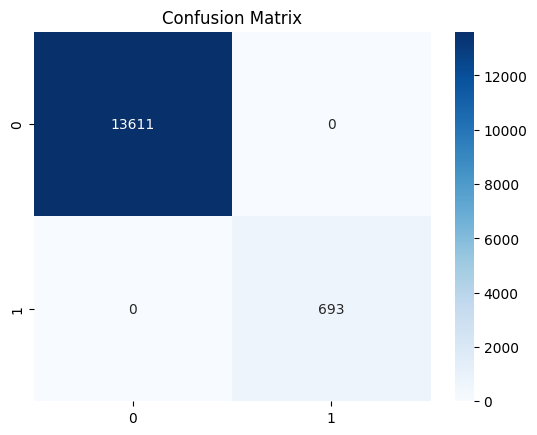

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

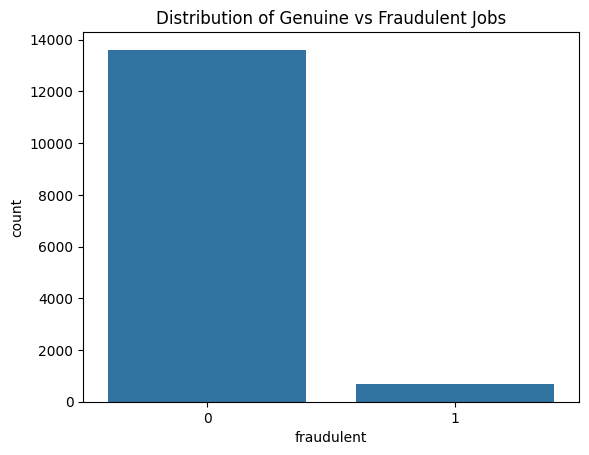

In [ ]:
sns.countplot(x='fraudulent', data=train_df)
plt.title('Distribution of Genuine vs Fraudulent Jobs')
plt.show()

In [ ]:
joblib.dump(pipeline, 'fraud_detector.pkl')

['fraud_detector.pkl']

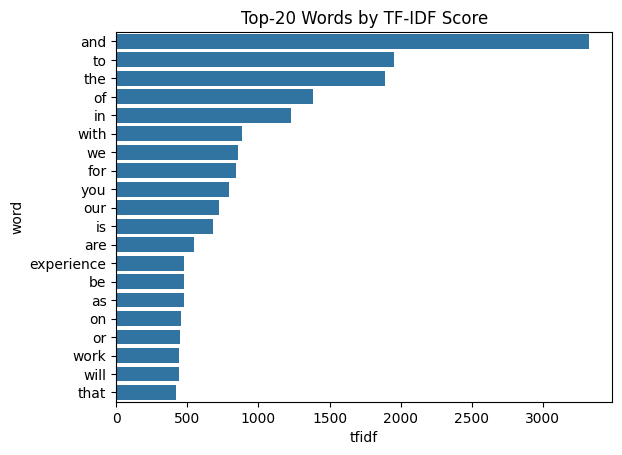

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X_train_text)
words = tfidf.get_feature_names_out()
sum_words = X_tfidf.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:20]

words_df = pd.DataFrame(word_freq, columns=['word', 'tfidf'])
sns.barplot(x='tfidf', y='word', data=words_df)
plt.title('Top-20 Words by TF-IDF Score')
plt.show()

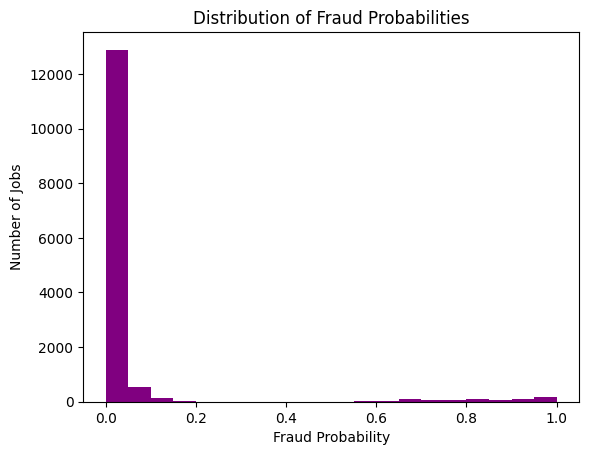

In [ ]:
probs = pipeline.predict_proba(X_train_text)[:, 1]
plt.hist(probs, bins=20, color='purple')
plt.title('Distribution of Fraud Probabilities')
plt.xlabel('Fraud Probability')
plt.ylabel('Number of Jobs')
plt.show()

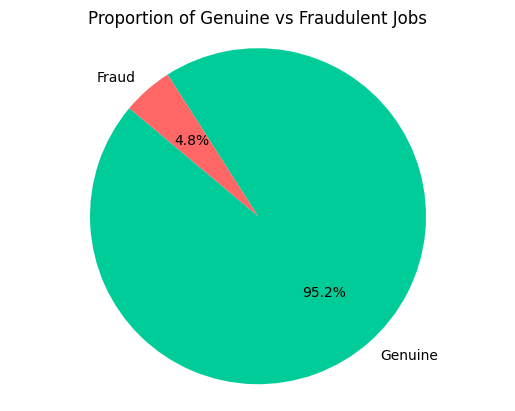

In [ ]:
labels = ['Genuine', 'Fraud']
sizes = train_df['fraudulent'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#00cc99','#ff6666'])
plt.title('Proportion of Genuine vs Fraudulent Jobs')
plt.axis('equal')
plt.show()

In [ ]:
probs_test = pipeline.predict_proba(X_test_text)[:, 1]
test_df['Fraud_Probability'] = probs_test
top_10 = test_df.sort_values('Fraud_Probability', ascending=False).head(10)
top_10[['title', 'location', 'Fraud_Probability']]

,title,location,Fraud_Probability
1737,Customer Service Representative,"US, FL, Jacksonville",0.98
877,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",0.96
114,"Part Time Staff Needed, Weekend Cash Job.","US, CA, Los Angeles",0.96
2279,Customer Service Representative,"US, CA, Los Angeles",0.95
1228,Immediate Staff Needed For Cash Positions.,"AU, NSW, Sydney",0.93
1180,UST Testing Technician II,"US, CA, Bakersfield",0.93
3181,Cash Job Opportunity To Immediate Start.,"AU, NSW, Sydney",0.90
2448,Lawn and Maintenance Contractors,"US, MD, Greenbelt",0.89
728,Data Entry Office Support,"US, MI, Detroit",0.88
3327,Executive Chef,"MY, 14, Kuala lumpur",0.87
